<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Add-scoring-categories" data-toc-modified-id="Add-scoring-categories-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Add scoring categories</a></span></li></ul></div>

# Add scoring categories

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read data

In [2]:
pp = pd.read_csv('../../data/csv/player_performance_03.csv')
pp.head()

,was_home,round,total_points,id,fixture,opponent_team,team,position,team_scored,team_conceded,...,value_away_form,team_scored_overall_form,team_scored_home_form,team_scored_away_form,team_conceded_overall_form,team_conceded_home_form,team_conceded_away_form,transfers_balance_overall_form,transfers_balance_home_form,transfers_balance_away_form
0,True,1,3,0,0,12,0,0,0,2,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,False,2,3,0,13,5,0,0,2,3,...,0.0,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
2,True,3,3,0,20,18,0,0,3,1,...,50.0,1.244919,0.000000,2.000000,2.622459,2.000000,3.000000,117.022354,0.000000,188.000000
3,False,4,1,0,32,4,0,0,3,2,...,50.0,2.418706,1.867378,2.000000,1.774110,1.377541,3.000000,4968.251316,5315.802688,188.000000
4,False,5,2,0,45,14,0,0,2,1,...,50.0,2.922304,1.867378,2.622459,1.729488,1.377541,2.377541,8489.295590,5315.802688,6035.382957


## Add scoring categories

Total Score | Number | Names
------------|--------|------
-Inf to 1   | 0      | Poor
2 to 3      | 1      | Average
4 to 6      | 2      | Good
7 to 9      | 3      | Very Good
10 to Inf   | 4      | Great

In [3]:
bins = [-np.inf, 1.5, 3.5, 6.5, 9.5, np.Inf]
pp["total_points_cat"] = pd.cut(pp["total_points"],
                                bins=bins,
                                labels=[0, 1, 2, 3, 4])

In [4]:
pp.head()

,was_home,round,total_points,id,fixture,opponent_team,team,position,team_scored,team_conceded,...,team_scored_overall_form,team_scored_home_form,team_scored_away_form,team_conceded_overall_form,team_conceded_home_form,team_conceded_away_form,transfers_balance_overall_form,transfers_balance_home_form,transfers_balance_away_form,total_points_cat
0,True,1,3,0,0,12,0,0,0,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,False,2,3,0,13,5,0,0,2,3,...,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1
2,True,3,3,0,20,18,0,0,3,1,...,1.244919,0.000000,2.000000,2.622459,2.000000,3.000000,117.022354,0.000000,188.000000,1
3,False,4,1,0,32,4,0,0,3,2,...,2.418706,1.867378,2.000000,1.774110,1.377541,3.000000,4968.251316,5315.802688,188.000000,0
4,False,5,2,0,45,14,0,0,2,1,...,2.922304,1.867378,2.622459,1.729488,1.377541,2.377541,8489.295590,5315.802688,6035.382957,1


In [5]:
pp["total_points_cat"].value_counts()

0    15397
1     3774
2     1346
3      813
4      460
Name: total_points_cat, dtype: int64

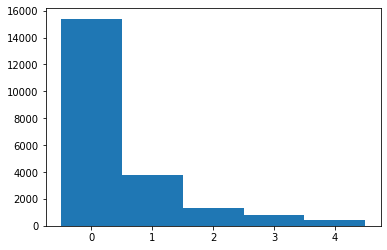

In [6]:
plt.hist(pp["total_points_cat"], bins=[-0.5,0.5,1.5,2.5,3.5,4.5]);

In [7]:
pp.to_csv(r'../../data/csv/player_performance_04.csv', index=False, index_label=False)